In [1]:
import matplotlib
import torch
import torchvision.models as models
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.transforms import transforms
from torch.autograd import Variable
import numpy as np
import torch.optim as optim

import matplotlib.pyplot as plt

from tools.Tester import ModelNetTester
from tools.ImgDataset import MultiviewImgDataset, SingleImgDataset
from models.MVCNN import MVCNN, SVCNN

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

model1 = SVCNN("cnet1").to(device)
model1.load_state_dict(torch.load('C:\\Users\\Disruptive\\Documents\\MachineLearning\\results\\mvcnn_stage_1\\mvcnn\\model-00027.pth'))

model2 = MVCNN("cnet2", model1).to(device)
model2.load_state_dict(torch.load('C:\\Users\\Disruptive\\Documents\\MachineLearning\\results\\mvcnn_stage_2\\mvcnn\\model-00015.pth'))

val_dataset = SingleImgDataset("modelnet40_images_new_12x/*/test", scale_aug=False, rot_aug=False, test_mode=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=0)
print('num_val_files: '+str(len(val_dataset.filepaths)))

c:\Users\Disruptive\Documents\MachineLearning\mvcnn_pytorch\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Disruptive\Documents\MachineLearning\mvcnn_pytorch\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG11_Weights.IMAGENET1K_V1`. You can also use `weights=VGG11_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


num_val_files: 29616


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


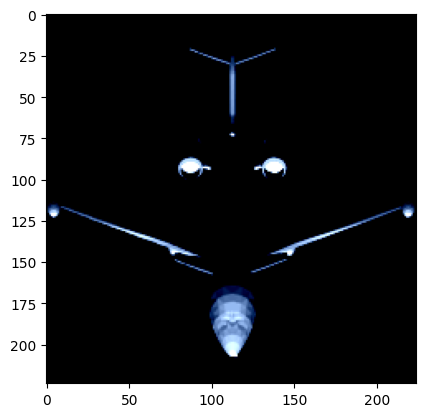

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


results.long:  tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')
Test: 0, Correct Points: 64/64


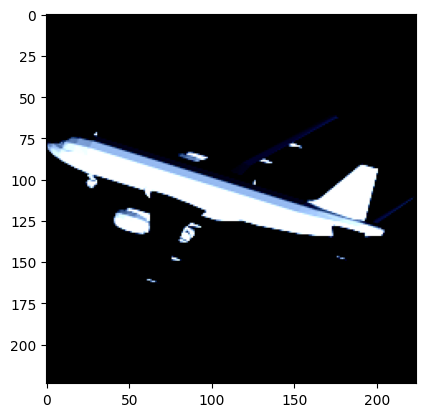

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


results.long:  tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')
Test: 1, Correct Points: 64/64


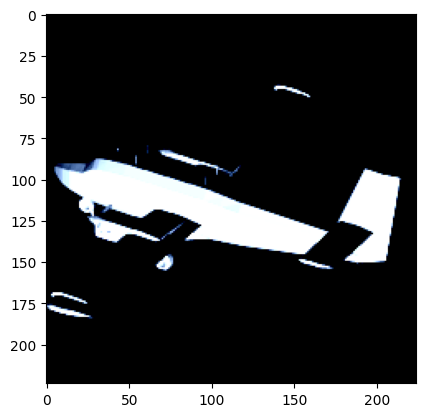

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


results.long:  tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')
Test: 2, Correct Points: 64/64


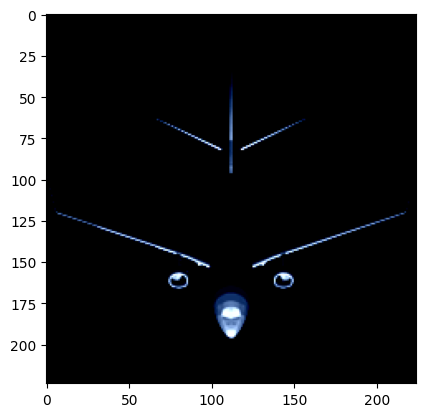

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


results.long:  tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')
Test: 3, Correct Points: 64/64


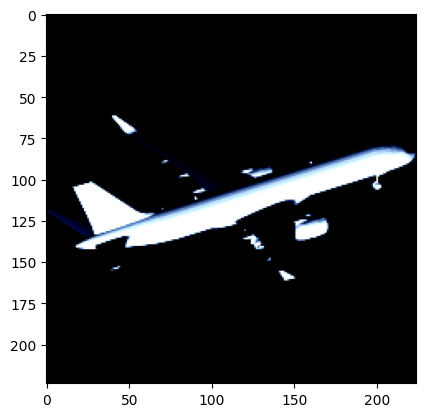

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


results.long:  tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')
Test: 4, Correct Points: 64/64


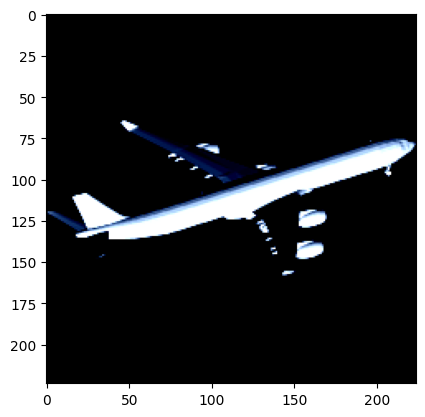

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


results.long:  tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], device='cuda:0')
Test: 5, Correct Points: 60/64


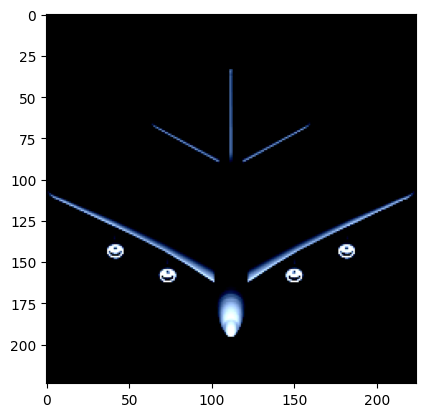

KeyboardInterrupt: 

In [2]:
model1.eval()
model2.eval()

model = model1
modelName = 'svcnn'

trainer = ModelNetTester(model, val_loader, nn.CrossEntropyLoss(), modelName,
                          num_views=1)
trainer.update_validation_accuracy()